## Nama : Nadya Lucyana (09011381823105)

## Klasifikasi Penyakit Jantung Menggunakan Naive Bayes

Jantung merupakan organ paling penting dalam tubuh manusia yang memiliki fungsi utama untuk memompa darah ke seluruh bagian tubuh melalui pembuluh darah. World Health Organization (WHO) menyebutkan bahwa penyakit jantung koroner (PJK) menjadi salah satu masalah kesehatan dalam system kardiovaskular yang jumlahnya meningkat cepat dengan angka kematian 6,7 juta kasus pada tahun 2017.

Data contains
1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
5. chol - serum cholestoral in mg/dl
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. restecg - resting electrocardiographic results
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest
11. slope - the slope of the peak exercise ST segment
12. ca - number of major vessels (0-3) colored by flourosopy
13. thal - 3 = normal; 6 = fixed defect; 7 = reversable defect
14. target - have disease or not (1=yes, 0=no)

### Naive Bayes

Naive Bayes merupakan metode pengelompokkan berdasarkan probabilitas sederhana yang dirancang untuk digunakan dengan asumsi antara suatu kelas dengan kelas lainnya tidak saling tergantung (independen). Pada naïve bayes, proses pembelajaran algoritma lebih ditekankan pada estimasi probabilitas. Keuntungan pada pendekatan ini yaitu pengelompokkan akan mendapatkan nilai error yang lebih kecil ketika menggunakan dataset berukuran besar. Selain itu klasifikasi Naïve Bayes terbukti memiliki akurasi dan kecepatan yang tinggi saat digunakan ke dalam basis data dengan jumlah yang besar.

Formulasi Naïve Bayes untuk klasifikasi adalah sebagai berikut:

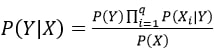

Keterangan	:
- P(Y|X)	: probabilitas data dengan vektor X pada kelas Y
- P(Y)		: probabilitas awal pada kelas Y (prior probability)
- P(Y)∏(i=1)^qP(Xi|Y)	: probabilitas independen kelas Y dari semua fitur dalam vector X
- P(X)		: probabilitas dari X

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

Script di atas digunakan untuk mengaktifkan package pandas dan numpy yang akan digunakan pada tahapan analisis. Package pandas sendiri digunakan untuk pengolahan data yang berkaitan dengan data frame. Package numpy digunakan untuk manipulasi array secara mudah dan cepat. Library matplotlib digunakan untuk men-plot-kan hasil akurasi dan loss nanti. Library untuk visualisasi data yang dibangun di atas matplotlib. Seaborn memiliki lebih banyak fungsi untuk visualisasi data dan lebih mudah digunakan.

### Load Data

In [2]:
dodo = pd.read_csv("heart.csv")
dodo.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
dodo.shape

(303, 14)

Setelah melihat hasilnya, ternyata data yang akan digunakan yaitu sebanyak 303 baris dan 14 kolom.

Sebelum melakukan analisis, terlebih dahulu digunakan fungsi “ .info ” untuk menampilkan informasi data yang akan dilakukan analisis.

In [36]:
dodo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Data yang akan dianalisis memiliki 14 variabel (kolom) yaitu kolom age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, slope, ca, dan thal yang memiliki type data integer dan kolom oldpeak dengan type data float. 

### Pre Processing

In [38]:
# Untuk melakukan pengecekan apakah terdapat deret data yang kosong
dodo.empty

False

In [37]:
# Untuk mengetahui berapa bayak data yang duplikat
dodo.duplicated().value_counts()

False    302
True       1
dtype: int64

In [42]:
dodo.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [40]:
# Statistik deskriptif data
dodo.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Plot

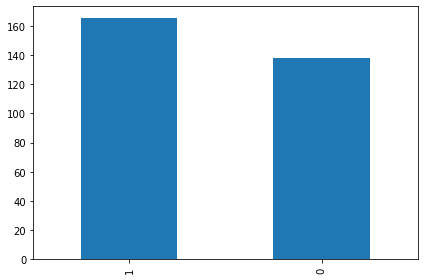

In [41]:
# Untuk melihat banyak data yang terkena penyakit jantung atau tidak
dodo['target'].value_counts().plot.bar()
plt.tight_layout()
plt.show()

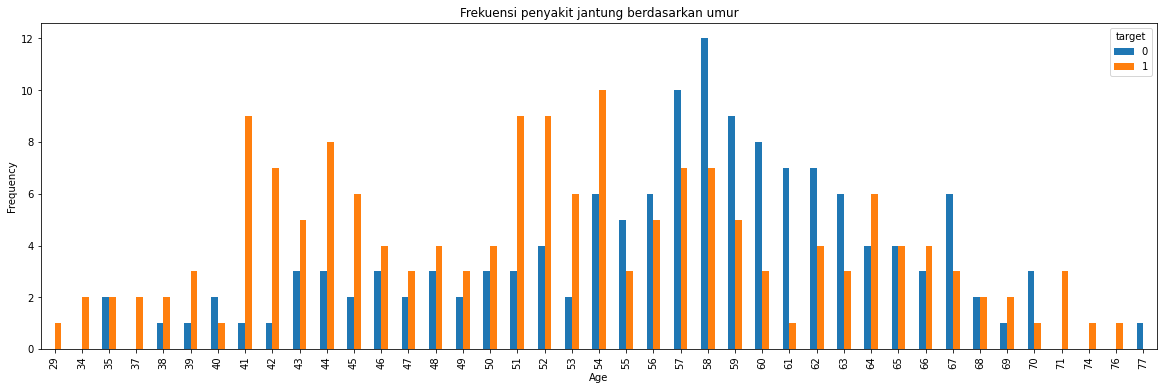

In [13]:
pd.crosstab(dodo.age,dodo.target).plot(kind="bar",figsize=(20,6))
plt.title('Frekuensi penyakit jantung berdasarkan umur')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

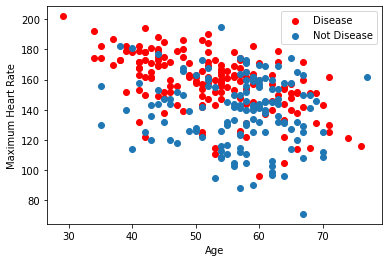

In [14]:
plt.scatter(x=dodo.age[dodo.target==1], y=dodo.thalach[(dodo.target==1)], c="red")
plt.scatter(x=dodo.age[dodo.target==0], y=dodo.thalach[(dodo.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

### Variabel Independen dan Variabel Dependen

Tahapan selanjutnya yaitu menentukan variabel independen dan variabel dependen dari data yang akan dianalisis. Berikut script yang digunakan.

In [15]:
X = dodo.drop(columns='target') 
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


Kolom target di drop atau di hapus dari data frame karena akan menjadi variabel dependen.

In [16]:
y = dodo['target'] 
y.head() 

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

### Train Test Split

Pertama dilakukan Train Test Split untuk membagi dataset menjadi training set dan test set.

In [17]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

In [18]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=123)

Script di atas membagi dataset menjadi 80% training set dan 20% test set. Yang artinya dari 303 data, training berisi 242 data dan test set berisi 61 data.

In [35]:
# check dimensi array dari masing-masing variable
print('X_train2 = ', X_train2.shape)
print('X_test2 = ', X_test2.shape)
print('y_train2 = ', y_train2.shape)
print('y_test2 = ', y_test2.shape)

X_train2 =  (242, 13)
X_test2 =  (61, 13)
y_train2 =  (242,)
y_test2 =  (61,)


### Prediksi pada Training Set dan Test Set

In [20]:
# Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

In [21]:
# Mengaktifkan/memanggil/membuat fungsi klasifikasi Naive bayes
classifier = GaussianNB()

untuk menampilkan fitting model dengan training data dan target

In [22]:
# Memasukkan data training pada fungsi klasifikasi naive bayes
classifier = classifier.fit(X_train2, y_train2)

In [23]:
# Menentukan hasil prediksi dari x_test2
predicted = classifier.predict(X_test2)

In [24]:
print(classifier.score(X_test2, y_test2))

0.8360655737704918


### Confusion Matrix

Confusion matrix merupakan salah satu metode yang dapat digunakan untuk mengukur kinerja suatu metode klasifikasi. Pada dasarnya confusion matrix mengandung informasi yang membandingkan hasil klasifikasi yang dilakukan oleh sistem dengan hasil klasifikasi yang seharusnya.

Pada pengukuran kinerja menggunakan confusion matrix, terdapat 4 (empat) istilah sebagai representasi hasil proses klasifikasi. Keempat istilah tersebut adalah True Positive (TP), True Negative (TN), False Positive (FP) dan False Negative (FN). Nilai True Negative (TN) merupakan jumlah data negatif yang terdeteksi dengan benar, sedangkan False Positive (FP) merupakan data negatif namun terdeteksi sebagai data positif. Sementara itu, True Positive (TP) merupakan data positif yang terdeteksi benar. False Negative (FN) merupakan kebalikan dari True Positive, sehingga data posifit, namun terdeteksi sebagai data negatif.
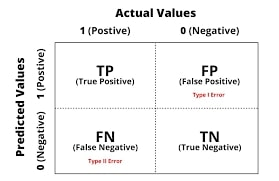

Berdasarkan nilai True Negative (TN), False Positive (FP), False Negative (FN), dan True Positive (TP) dapat diperoleh nilai akurasi, presisi dan recall. Nilai akurasi menggambarkan seberapa akurat sistem dapat mengklasifikasikan data secara benar. Dengan kata lain, nilai akurasi merupakan perbandingan antara data yang terklasifikasi benar dengan keseluruhan data. Nilai akurasi dapat diperoleh dengan Persamaan 1. Nilai presisi menggambarkan jumlah data kategori positif yang diklasifikasikan secara benar dibagi dengan total data yang diklasifikasi positif. Presisi dapat diperoleh dengan Persamaan 2. Sementara itu, recall menunjukkan berapa persen data kategori positif yang terklasifikasikan dengan benar oleh sistem. Nilai recall diperoleh dengan Persamaan 3.
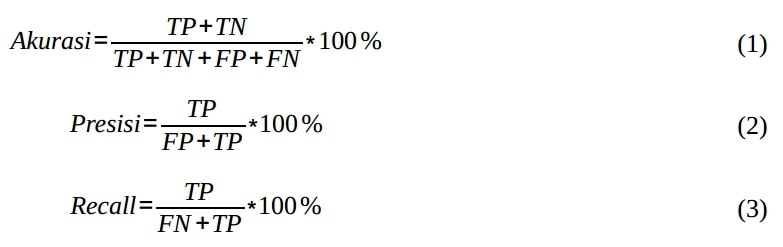

In [30]:
# import confusion_matrix model
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

In [31]:
#import confusion_matrix model
confusion_matrix(y_test2, y_pred2)
print(confusion_matrix(y_test2, y_pred2))

[[27  3]
 [ 7 24]]


In [32]:
y_true = y_test2
y_pred2 = predicted

print(accuracy_score(y_true, y_pred2))

0.8360655737704918


menghasilkan peforma akurasi sebesar 0.836 atau 84%

In [33]:
#menghitung nilai akurasi dari klasifikasi naive bayes 
print(classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84        30
           1       0.89      0.77      0.83        31

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



### Kesimpulan

Kesimpulan yang dapat diambil dengan menggunakan model Naive Bayes, berdasarkan nilai True Negative (TN), False Positive (FP), False Negative (FN), dan True Positive (TP) dapat diperoleh nilai akurasi, presisi dan recall. Dari 100% dataset yang digunakan dibagi menjadi 80% sebagai data latih (training data) dan 20% sebagai data uji (testing data). Hasil akurasi yang didapatkan pada percobaan ini sebesar 0.8360655737704918 atau 84%. 